# 惠聚电商平台用户品类偏好与消费行为深度分析

## 阶段三：用户品类偏好与高价值品类挖掘

### 1. 引言与目标

在前两个阶段，我们完成了数据的理解、预处理以及初步的探索性分析。我们对用户的人口统计学特征、热门品类以及整体消费水平有了基本认知。

本阶段是整个项目的核心，我们将深入探究不同用户细分群体在商品品类选择上的具体偏好，并结合消费金额，识别出对平台具有高价值或高潜力的用户-品类组合。

**本阶段核心分析目标**：
1.  **细分用户群体**：基于性别、年龄、城市类别、婚姻状况等关键特征。
2.  **品类偏好分析（购买次数维度）**：分析不同用户群体对各个商品品类的购买频次差异。
3.  **品类消费贡献分析（购买金额维度）**：分析不同用户群体在各个商品品类上的总消费额和平均消费额。
4.  **高价值/潜力用户-品类识别**：找出那些特定用户群体高度偏好且贡献较高销售额的品类组合。
5.  **（可选）用户画像与品类组合**：尝试构建更精细的用户画像，并总结其典型的品类消费模式。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 绘图美化与中文支持配置 (与Notebook 02一致) ---
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_palette('pastel') 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 替换为你系统中可用的中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16 # 调整标题大小以适应更复杂的图
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 11 # 可能需要根据图调整
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 18
# --- 结束配置 ---

# 配置pandas显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 加载数据 (与Notebook 02一致，重新加载并进行类型转换)
data_path = '../data/huiju_sales_data_2022_processed.csv'
try:
    df = pd.read_csv(data_path)
    print("数据加载成功！")
    
    # 应用在01中确定的类型转换
    df['Occupation'] = df['Occupation'].astype('category')
    df['Marital_Status'] = df['Marital_Status'].astype('category')
    df['Product_Category'] = df['Product_Category'].astype('category')
    df['Gender'] = df['Gender'].astype('category')
    df['Age'] = df['Age'].astype('category')
    df['City_Category'] = df['City_Category'].astype('category')
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
    
    print("数据类型已转换。")
    # df.info() # 可以注释掉，因为我们已经熟悉数据了
except FileNotFoundError:
    print(f"错误：数据文件未在指定路径找到: {data_path}")
    df = None

if df is not None:
    print(f"\n数据集记录数: {len(df)}")
    print(f"独立用户数: {df['User_ID'].nunique()}")
    print(f"独立商品数: {df['Product_ID'].nunique()}")
    print(f"独立商品品类数: {df['Product_Category'].nunique()}")

数据加载成功！
数据类型已转换。

数据集记录数: 550068
独立用户数: 5891
独立商品数: 3631
独立商品品类数: 20


### 2. 用户群体 vs. 商品品类偏好 (基于购买次数)

在这一部分，我们将分析不同用户细分群体对各个商品品类的购买次数，以揭示他们的选择偏好。
我们将主要使用 `groupby()` 和 `value_counts()`，并结合可视化手段（如分组条形图或热力图）。

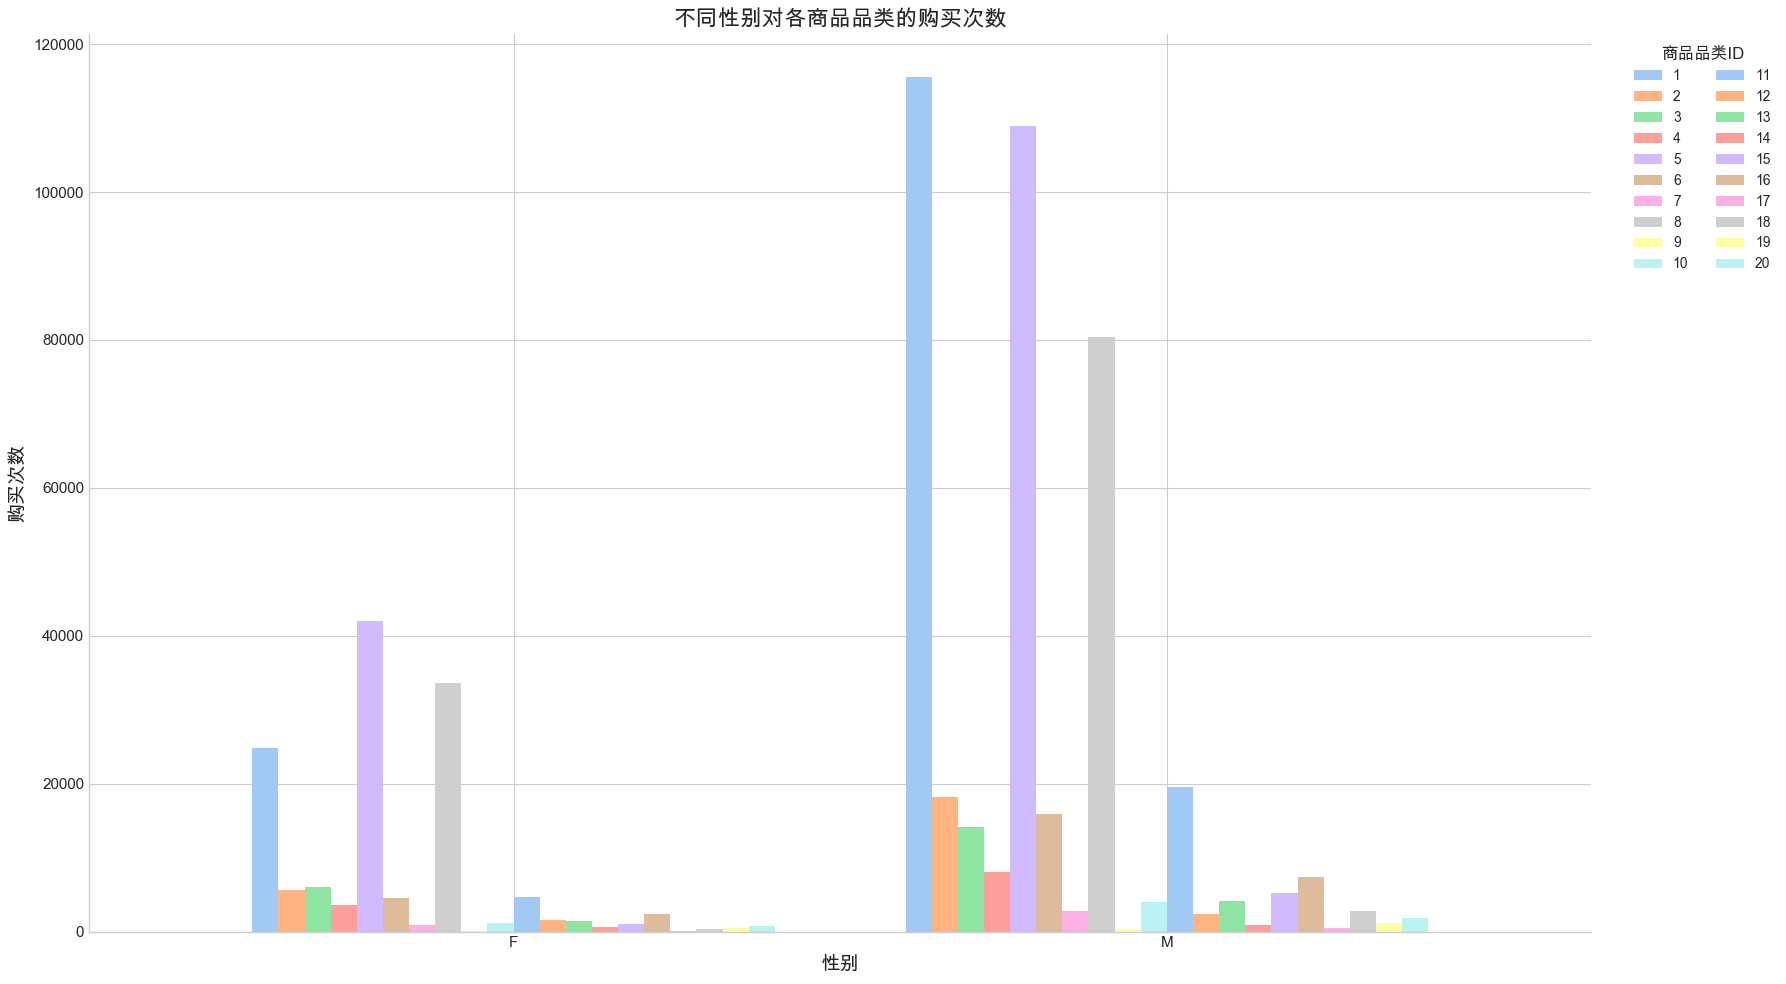

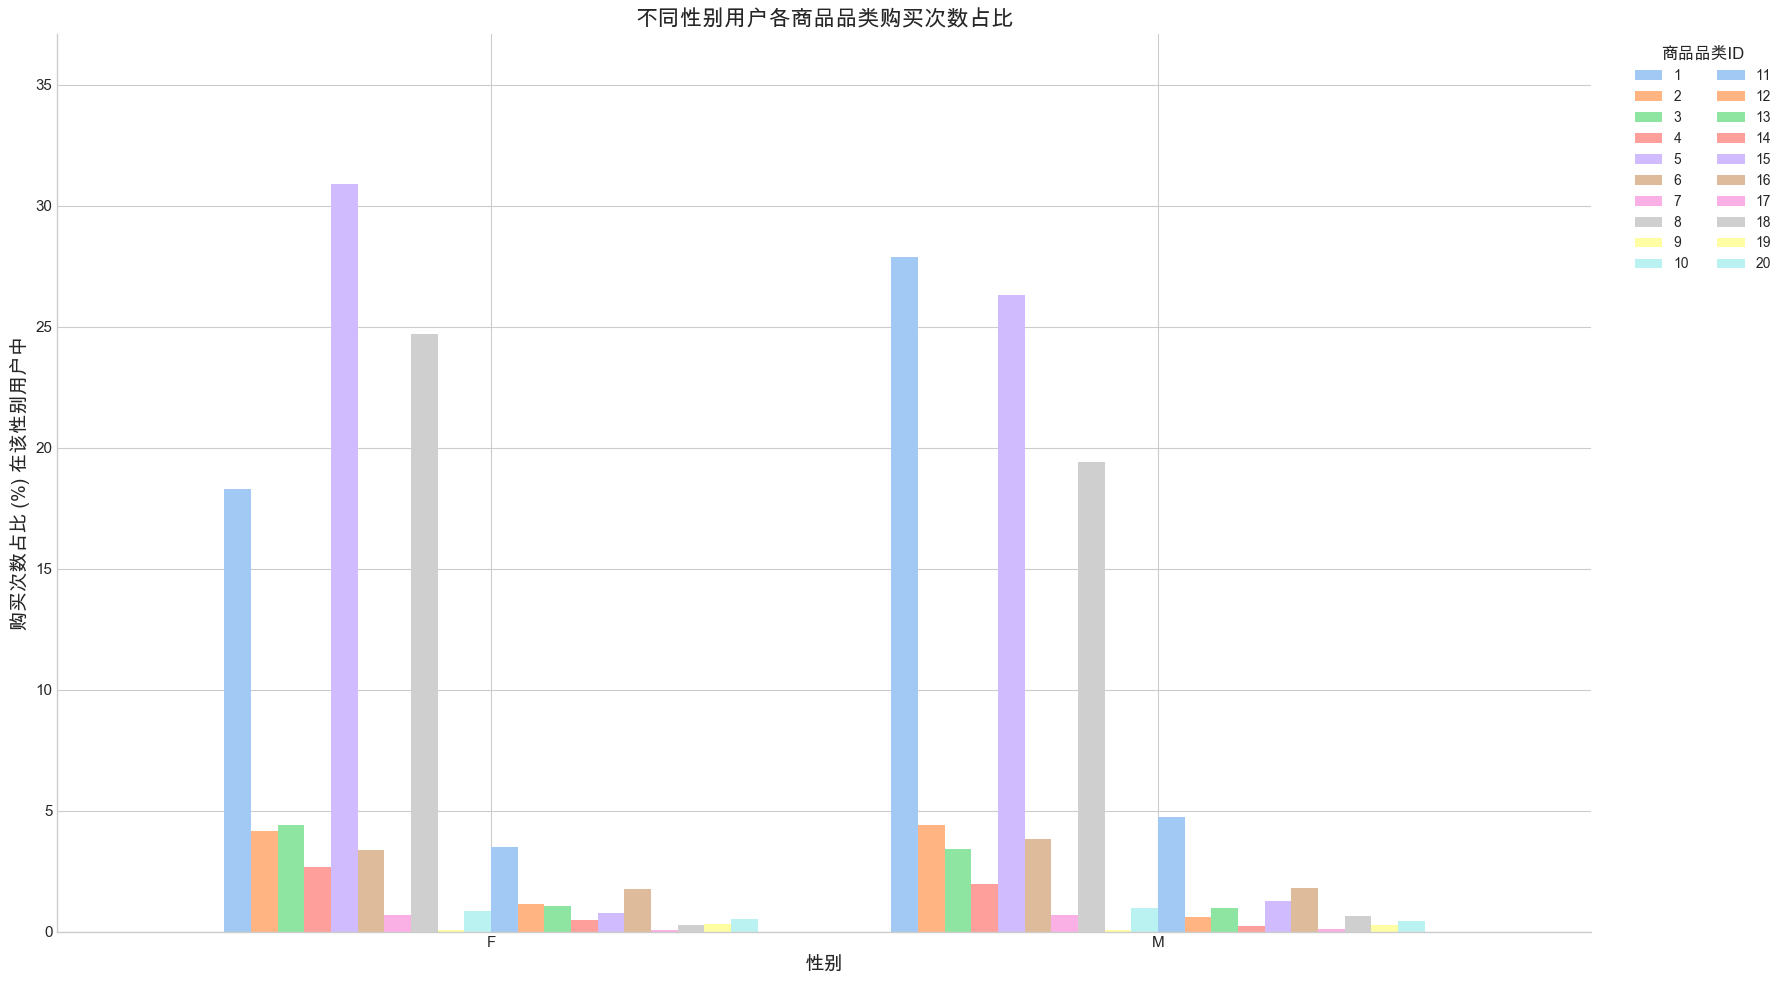

不同性别对各商品品类的购买次数:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827



不同性别用户各商品品类购买次数占比 (%):


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,18.284,4.166,4.422,2.679,30.897,3.357,0.694,24.710,0.052,0.856,3.489,1.128,1.077,0.459,0.770,1.769,0.046,0.281,0.332,0.532
M,27.892,4.395,3.429,1.959,26.305,3.840,0.671,19.400,0.082,0.957,4.719,0.583,0.987,0.217,1.266,1.793,0.125,0.662,0.278,0.441


In [2]:
if df is not None:
    # 按性别和商品品类分组，计算购买次数
    gender_category_counts = df.groupby(['Gender', 'Product_Category'], observed=False).size().unstack(fill_value=0)
    
    # 可视化：分组柱状图
    # 为了更好的比较，我们可以计算每个性别内各品类的购买占比，或者直接比较次数
    
    # 方案1: 直接比较次数
    gender_category_counts.plot(kind='bar', figsize=(18, 10), width=0.8)
    plt.title('不同性别对各商品品类的购买次数')
    plt.xlabel('性别')
    plt.ylabel('购买次数')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2) # 图例放旁边，分两列
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 方案2: 比较各性别内部，各品类的购买次数占比 (归一化)
    gender_category_percentage = gender_category_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    
    gender_category_percentage.plot(kind='bar', stacked=False, figsize=(18, 10), width=0.8) # 非堆叠，更容易比较
    plt.title('不同性别用户各商品品类购买次数占比')
    plt.xlabel('性别')
    plt.ylabel('购买次数占比 (%) 在该性别用户中')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    plt.ylim(0, gender_category_percentage.max().max() * 1.2) # 调整y轴，避免图例遮挡最高的柱子
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("不同性别对各商品品类的购买次数:")
    display(gender_category_counts)
    print("\n不同性别用户各商品品类购买次数占比 (%):")
    display(gender_category_percentage)

#### 2.2 年龄段 vs. 商品品类购买次数

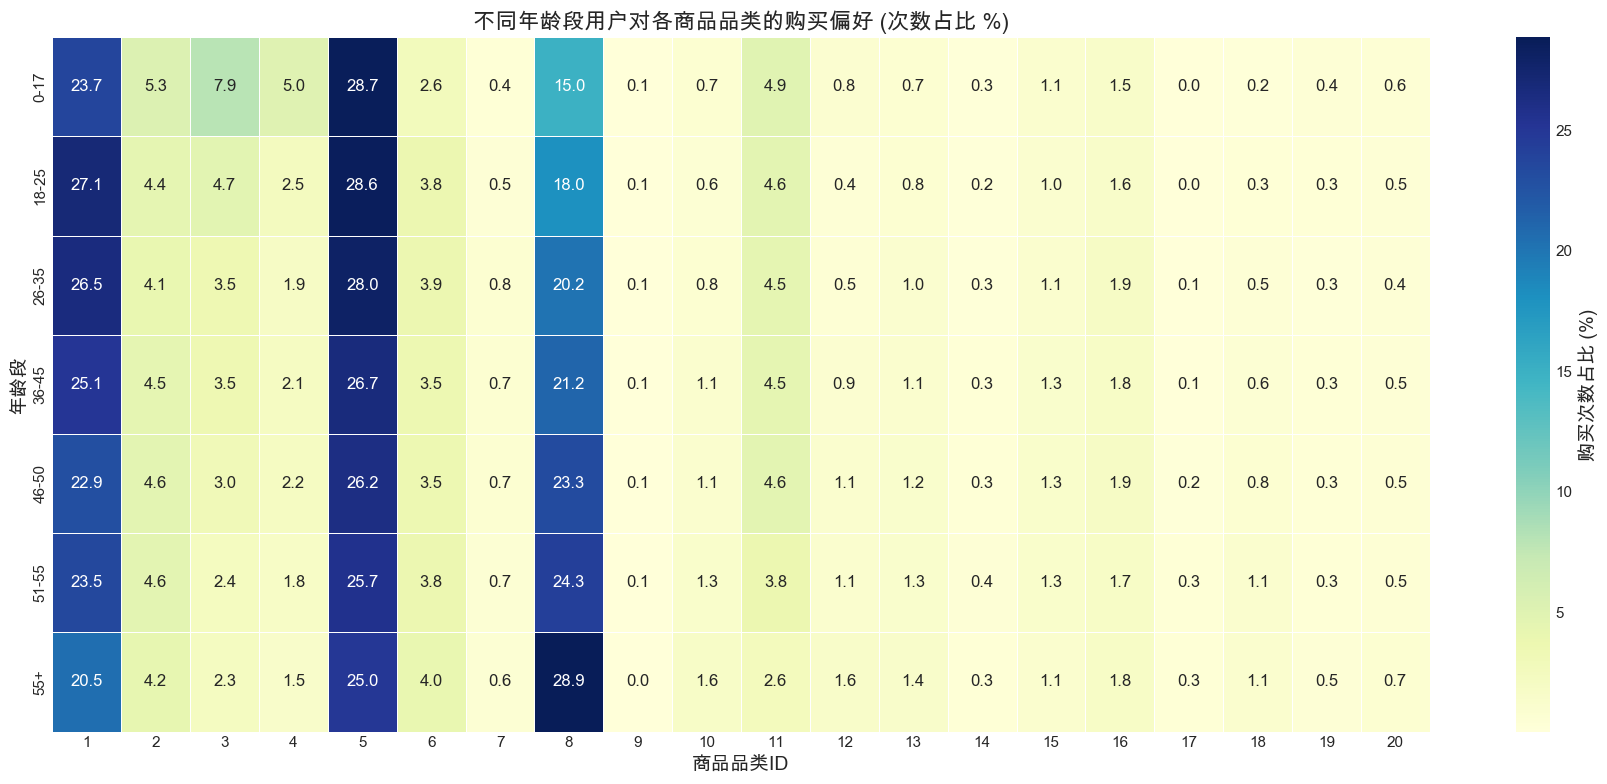

不同年龄段对各商品品类的购买次数:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,740,125,112,39,160,229,6,27,59,90
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,4597,439,756,230,1024,1598,41,339,275,469
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,9874,1096,2096,564,2372,4118,127,1042,563,898
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,4953,994,1250,312,1395,1955,135,702,320,506
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,2104,520,551,149,602,879,95,351,149,227
51-55,9049,1781,924,678,9893,1450,266,9340,29,519,1458,433,483,154,508,672,107,423,134,200
55+,4411,905,487,318,5367,862,134,6208,8,350,561,340,301,75,229,377,67,241,103,160


In [3]:
if df is not None:
    age_category_counts = df.groupby(['Age', 'Product_Category'], observed=False).size().unstack(fill_value=0)
    
    # 为了更好的比较不同年龄段的偏好，计算各年龄段内部品类的购买占比
    age_category_percentage = age_category_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # 可视化：热力图
    plt.figure(figsize=(18, 8)) # 调整尺寸以适应热力图
    # 定义年龄段的逻辑顺序
    age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    sns.heatmap(age_category_percentage.reindex(age_order), annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': '购买次数占比 (%)'})
    plt.title('不同年龄段用户对各商品品类的购买偏好 (次数占比 %)')
    plt.xlabel('商品品类ID')
    plt.ylabel('年龄段')
    plt.tight_layout()
    plt.show()

    print("不同年龄段对各商品品类的购买次数:")
    display(age_category_counts.reindex(age_order)) # 按年龄段顺序显示
    # print("\n不同年龄段用户各商品品类购买次数占比 (%):") # 热力图已显示，可不打印
    # display(age_category_percentage.reindex(age_order))

#### 2.3 城市类别 vs. 商品品类购买次数

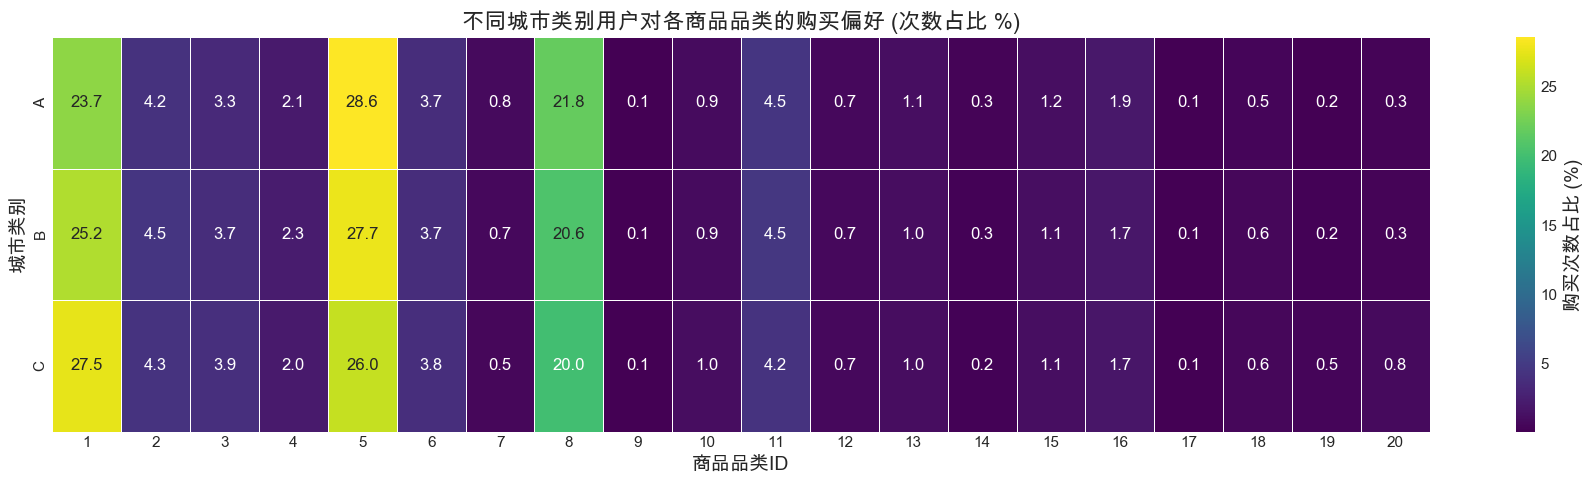

不同城市类别对各商品品类的购买次数:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,35081,6141,4943,3050,42211,5507,1226,32179,110,1333,6601,1063,1614,481,1717,2848,121,753,273,468
B,58253,10444,8587,5226,64138,8526,1599,47553,174,2063,10485,1675,2271,632,2638,4038,267,1389,462,753
C,47044,7279,6683,3477,44584,6433,896,34193,126,1729,7201,1209,1664,410,1935,2942,190,983,868,1329


In [4]:
if df is not None:
    city_category_counts = df.groupby(['City_Category', 'Product_Category'], observed=False).size().unstack(fill_value=0)
    city_category_percentage = city_category_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # 可视化：热力图
    city_order = sorted(df['City_Category'].unique().astype(str))
    plt.figure(figsize=(18, 5)) # 城市类别少，高度可以小一些
    sns.heatmap(city_category_percentage.reindex(city_order), annot=True, fmt=".1f", cmap="viridis", linewidths=.5, cbar_kws={'label': '购买次数占比 (%)'})
    plt.title('不同城市类别用户对各商品品类的购买偏好 (次数占比 %)')
    plt.xlabel('商品品类ID')
    plt.ylabel('城市类别')
    plt.tight_layout()
    plt.show()

    # 或者用分组柱状图 (如果觉得热力图不够直观)
    # city_category_percentage.reindex(city_order).plot(kind='bar', figsize=(15,8), width=0.8)
    # plt.title('不同城市类别用户各商品品类购买次数占比')
    # plt.xlabel('城市类别')
    # plt.ylabel('购买次数占比 (%)')
    # plt.xticks(rotation=0)
    # plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    # plt.tight_layout()
    # plt.show()

    print("不同城市类别对各商品品类的购买次数:")
    display(city_category_counts.reindex(city_order))

#### 2.4 (可选) 婚姻状况 vs. 商品品类购买次数

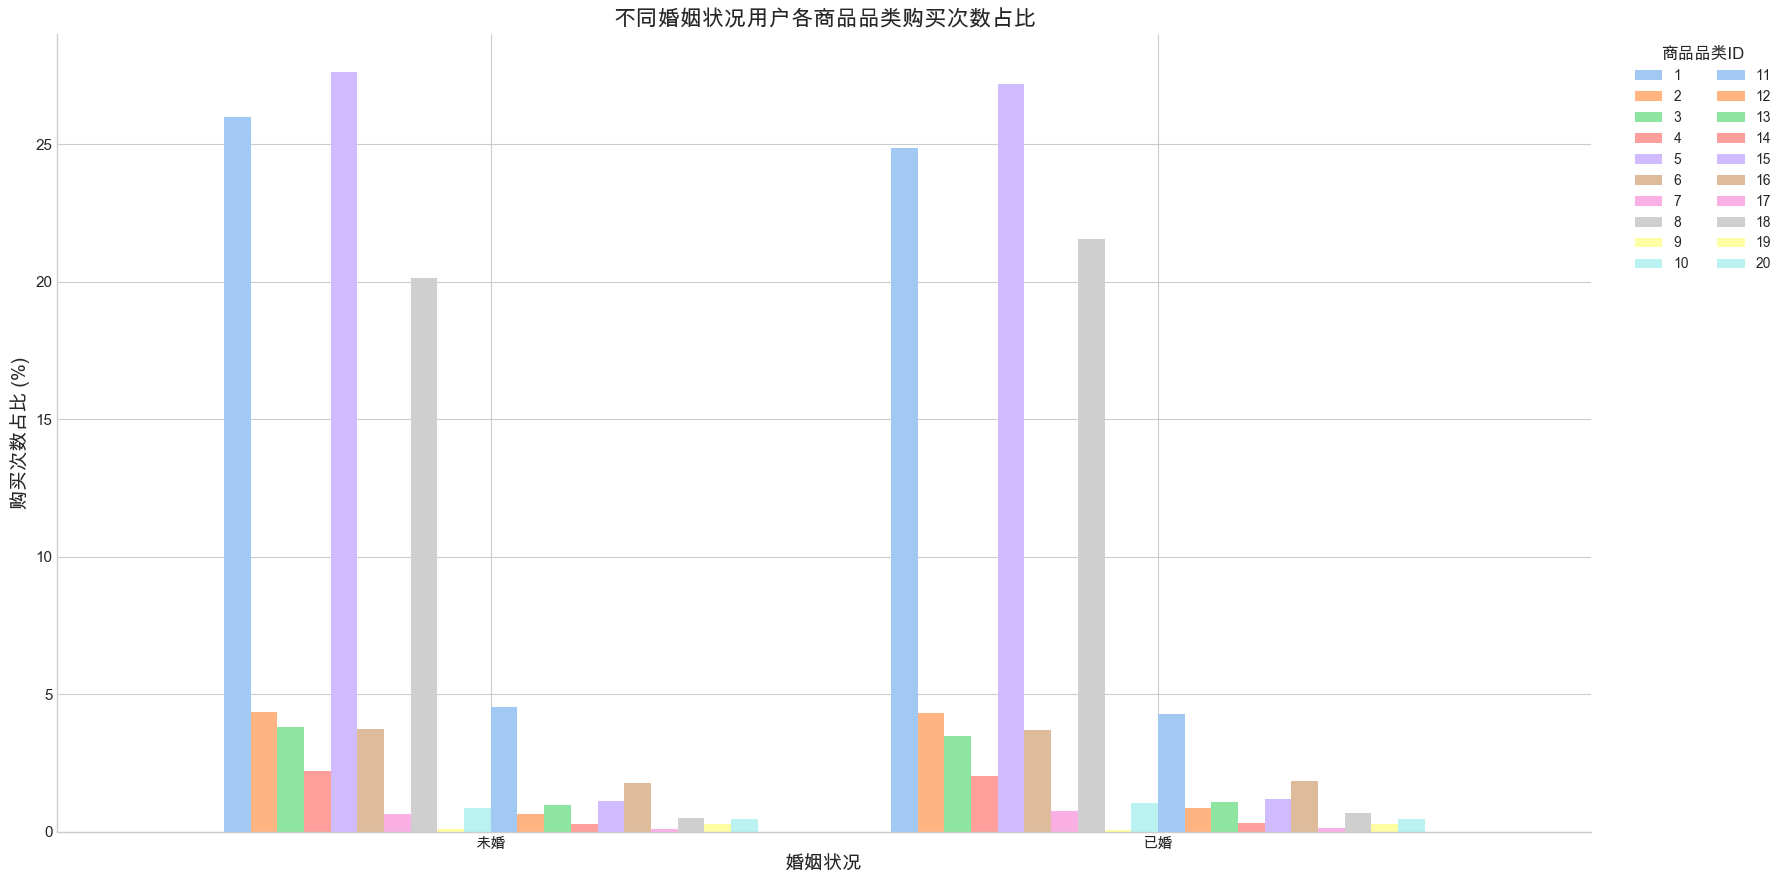

不同婚姻状况对各商品品类的购买次数:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status_Label,,,,,,,,,,,,,,,,,,,,
未婚,84375,14138,12359,7177,89656,12139,2040,65411,247,2778,14668,2034,3162,846,3623,5713,298,1641,946,1480
已婚,56003,9726,7854,4576,61277,8327,1681,48514,163,2347,9619,1913,2387,677,2667,4115,280,1484,657,1070


In [5]:
if df is not None:
    marital_map = {0: '未婚', 1: '已婚'}
    # 创建一个包含标签的列用于分组
    df_marital_labeled = df.assign(Marital_Status_Label=df['Marital_Status'].map(marital_map))
    
    marital_category_counts = df_marital_labeled.groupby(['Marital_Status_Label', 'Product_Category'], observed=False).size().unstack(fill_value=0)
    marital_category_percentage = marital_category_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # 可视化：分组柱状图 (因为只有两个婚姻状况类别)
    marital_category_percentage.plot(kind='bar', figsize=(18, 9), width=0.8)
    plt.title('不同婚姻状况用户各商品品类购买次数占比')
    plt.xlabel('婚姻状况')
    plt.ylabel('购买次数占比 (%)')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("不同婚姻状况对各商品品类的购买次数:")
    display(marital_category_counts)

### 3. 用户群体 vs. 商品品类消费贡献 (基于购买金额)

在了解了各群体对品类的购买次数偏好后，我们进一步分析他们在各品类上的实际消费金额。这将帮助我们识别哪些品类是特定用户群体的“金牛”业务。
我们将计算：
1.  各用户群体在各品类上的 **总购买金额**。
2.  各用户群体在各品类上的 **平均购买金额** (客单价)。

#### 3.1 性别 vs. 商品品类总购买金额

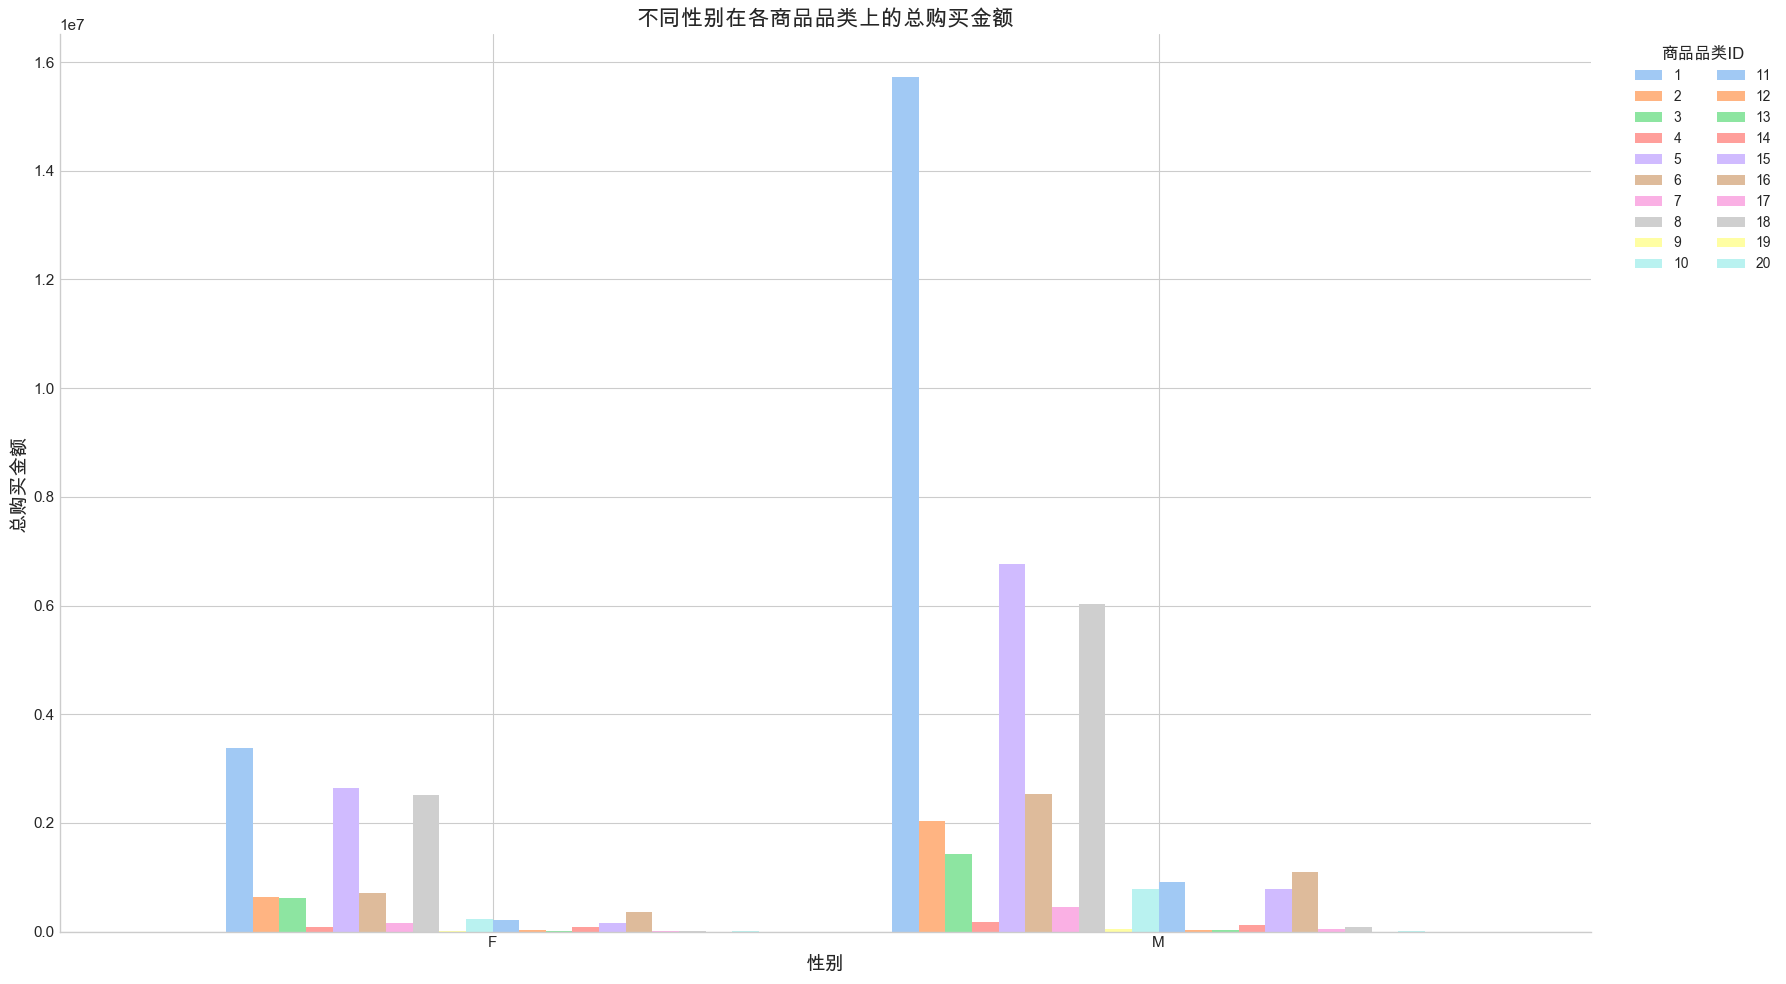

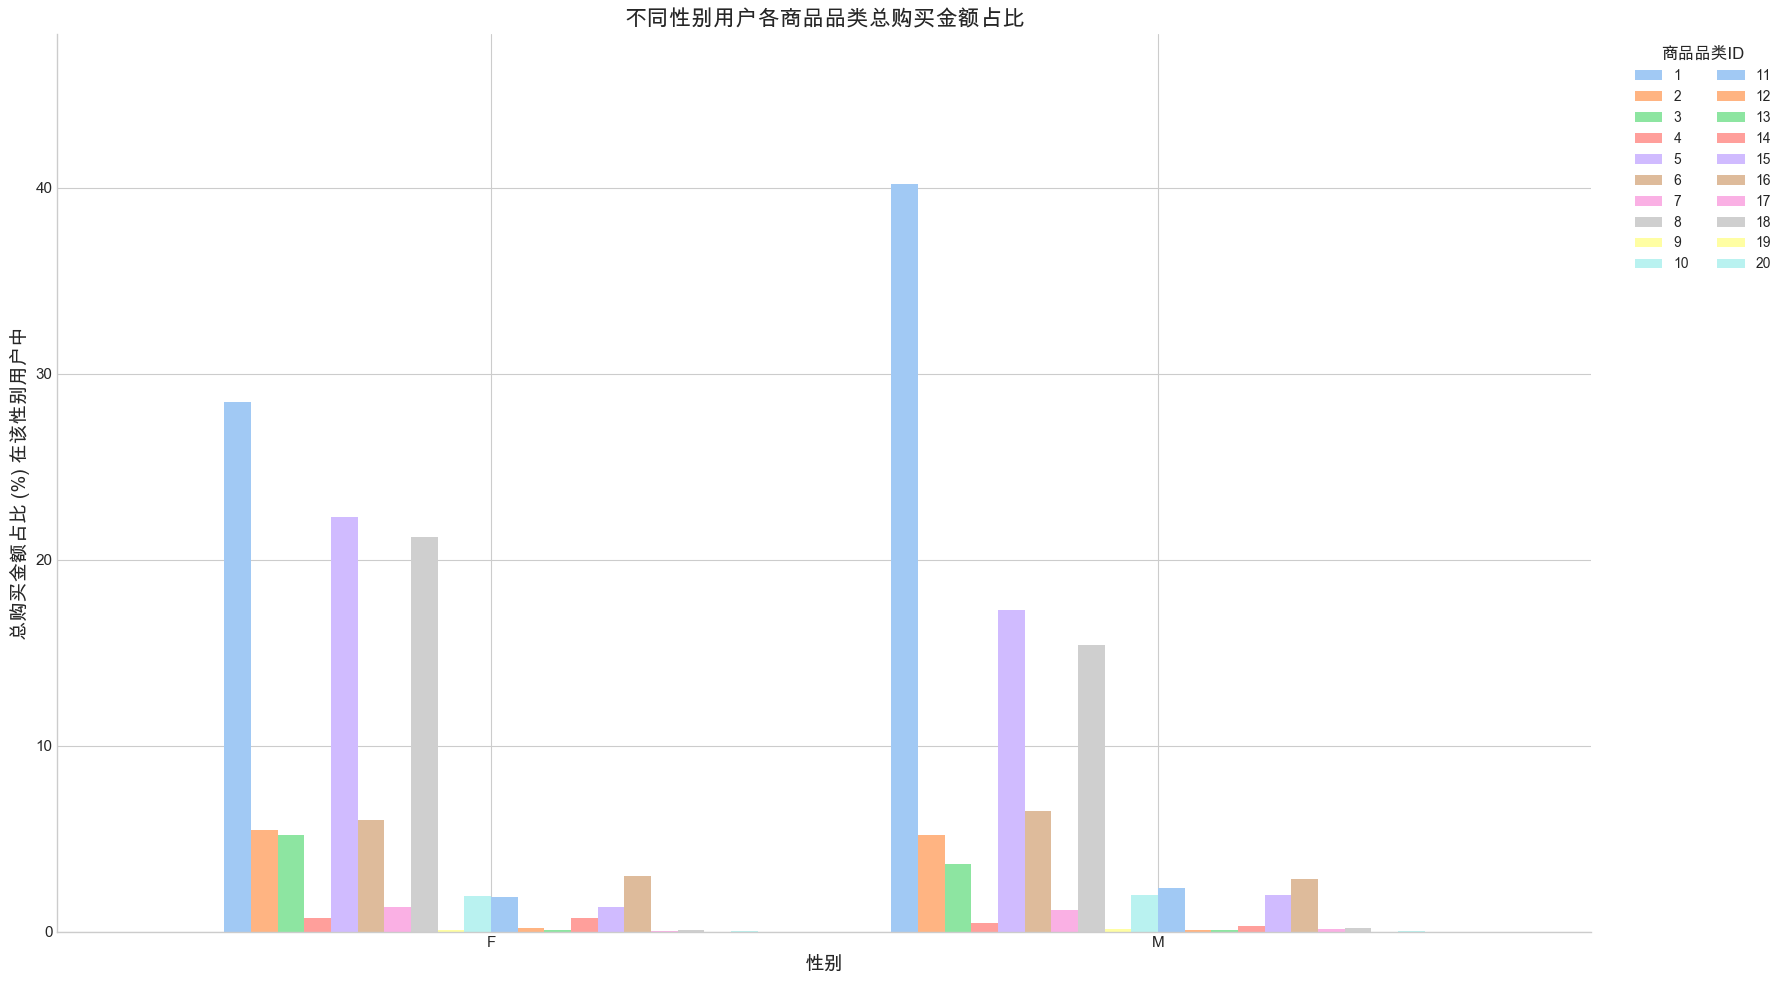

不同性别在各商品品类上的总购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,3376311.450,645436.170,616375.160,89332.060,2646580.780,711041.160,154603.470,2516824.760,11007.020,228821.930,221613.260,21798.970,10728.840,85646.070,153713.120,352649.420,6104.770,10881.680,169.920,2686.410
M,15723826.090,2039725.690,1424471.970,184472.820,6771771.510,2530461.860,454363.840,6026363.230,52696.220,779551.080,916297.890,31519.470,29357.170,114500.890,775977.300,1098556.700,52682.220,82020.330,423.860,6760.860



不同性别用户各商品品类总购买金额占比 (%):


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,28.462,5.441,5.196,0.753,22.311,5.994,1.303,21.217,0.093,1.929,1.868,0.184,0.090,0.722,1.296,2.973,0.051,0.092,0.001,0.023
M,40.219,5.217,3.644,0.472,17.321,6.472,1.162,15.414,0.135,1.994,2.344,0.081,0.075,0.293,1.985,2.810,0.135,0.210,0.001,0.017


In [6]:
if df is not None:
    # 按性别和商品品类分组，计算总购买金额
    gender_category_purchase_sum = df.groupby(['Gender', 'Product_Category'], observed=False)['Purchase'].sum().unstack(fill_value=0)
    
    # 可视化：分组柱状图
    gender_category_purchase_sum.plot(kind='bar', figsize=(18, 10), width=0.8)
    plt.title('不同性别在各商品品类上的总购买金额')
    plt.xlabel('性别')
    plt.ylabel('总购买金额')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 为了更好的比较，计算每个性别内部，各品类贡献的总购买金额占比
    gender_category_purchase_percentage = gender_category_purchase_sum.apply(lambda x: x / x.sum() * 100, axis=1)
    
    gender_category_purchase_percentage.plot(kind='bar', stacked=False, figsize=(18, 10), width=0.8) # 非堆叠
    plt.title('不同性别用户各商品品类总购买金额占比')
    plt.xlabel('性别')
    plt.ylabel('总购买金额占比 (%) 在该性别用户中')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    plt.ylim(0, gender_category_purchase_percentage.max().max() * 1.2)
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("不同性别在各商品品类上的总购买金额:")
    display(gender_category_purchase_sum)
    print("\n不同性别用户各商品品类总购买金额占比 (%):")
    display(gender_category_purchase_percentage)

#### 3.2 年龄段 vs. 商品品类总购买金额

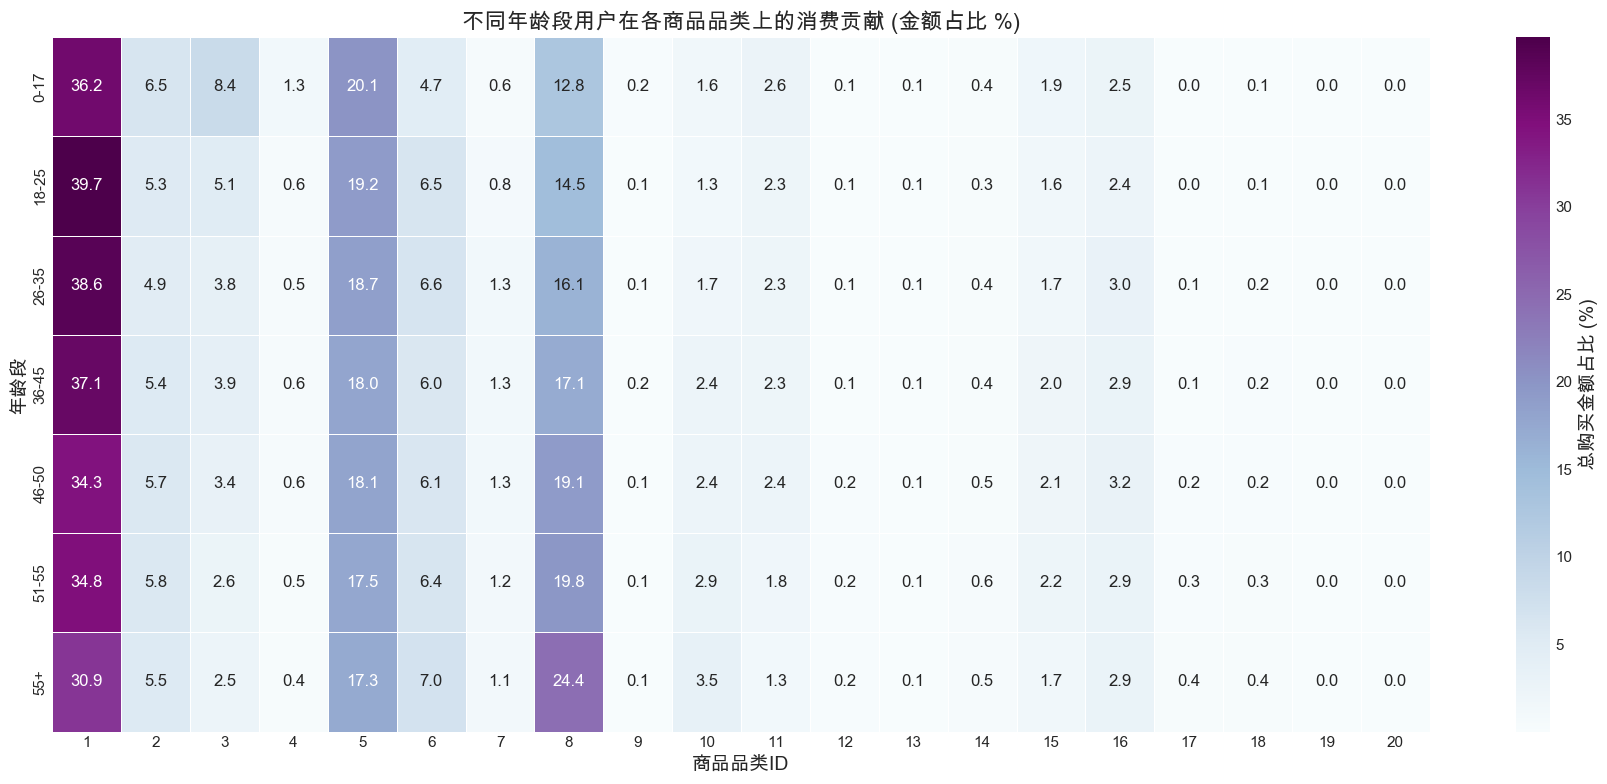

不同年龄段在各商品品类上的总购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,487832.470,87358.460,113178.060,17014.520,270597.120,63771.540,8210.140,172347.890,2469.580,22242.730,35580.430,1779.640,825.730,5122.270,25575.340,33516.330,608.630,747.030,22.710,331.210
18-25,3626079.720,485607.330,464958.370,54047.060,1751987.820,591165.710,77262.310,1323200.610,10790.420,115729.080,211329.430,5588.640,5306.390,29220.390,147028.380,223613.930,3885.360,9864.250,99.130,1722.420
26-35,7838134.590,989571.880,778059.630,98100.460,3797024.930,1337126.870,269793.300,3275233.390,24137.580,349541.060,461812.220,14491.850,15022.970,72085.560,344555.430,605274.250,12482.850,31668.550,207.390,3381.020
36-45,3806319.040,558786.480,398514.940,56507.970,1845779.710,616172.980,133088.540,1753860.800,15717.710,242701.930,235898.720,13421.650,8997.740,42193.270,208787.730,292638.130,13650.160,20700.490,118.480,1842.370
46-50,1443118.000,241634.460,141200.370,23958.130,762796.510,258168.280,54347.260,802678.060,4870.600,102204.630,99777.680,7193.940,4026.180,19544.540,88553.680,133486.820,9781.780,10165.810,55.210,872.090
51-55,1278241.200,211968.380,95425.400,16583.750,643262.140,235293.070,43562.590,725913.750,4227.240,106554.580,67480.720,5977.190,3684.530,21808.260,81389.870,105032.880,11275.670,12540.820,50.800,723.600
55+,620412.520,110234.870,49510.360,7592.990,346904.060,139804.570,22703.170,489953.490,1490.110,69399.000,26031.950,4865.530,2222.470,10172.670,33799.990,57643.780,7102.540,7215.060,40.060,574.560


In [7]:
if df is not None:
    age_category_purchase_sum = df.groupby(['Age', 'Product_Category'], observed=False)['Purchase'].sum().unstack(fill_value=0)
    
    # 计算各年龄段内部，各品类贡献的总购买金额占比
    age_category_purchase_percentage = age_category_purchase_sum.apply(lambda x: x / x.sum() * 100, axis=1)
    
    age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    plt.figure(figsize=(18, 8))
    sns.heatmap(age_category_purchase_percentage.reindex(age_order), annot=True, fmt=".1f", cmap="BuPu", linewidths=.5, cbar_kws={'label': '总购买金额占比 (%)'})
    plt.title('不同年龄段用户在各商品品类上的消费贡献 (金额占比 %)')
    plt.xlabel('商品品类ID')
    plt.ylabel('年龄段')
    plt.tight_layout()
    plt.show()

    print("不同年龄段在各商品品类上的总购买金额:")
    display(age_category_purchase_sum.reindex(age_order))

#### 3.3 城市类别 vs. 商品品类总购买金额

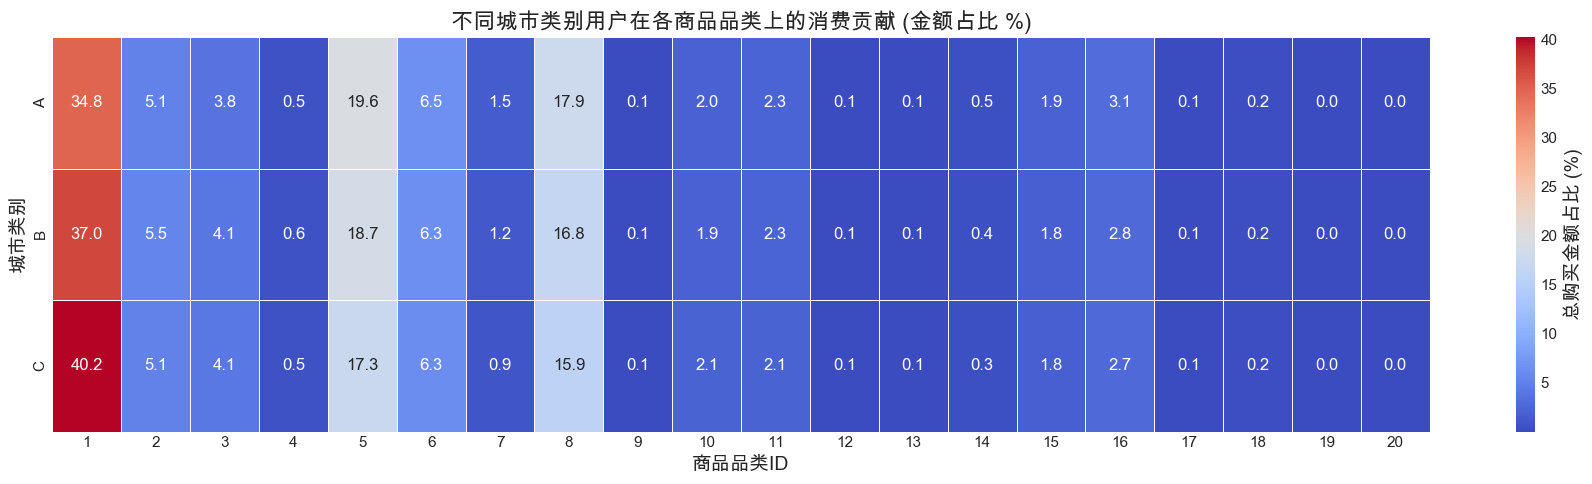

不同城市类别在各商品品类上的总购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,4577080.140,669587.300,495900.600,69227.070,2582401.170,854673.610,199093.130,2358098.730,16303.260,260341.480,302189.550,14188.110,11361.870,60687.520,251627.570,406173.610,11794.720,22134.460,100.830,1751.880
B,7826829.800,1162824.780,858534.490,120200.800,3956411.520,1342930.520,261517.550,3544975.310,27301.550,404604.900,483597.090,22269.150,16211.160,82114.050,384741.410,588918.540,27210.700,41102.820,175.660,2864.250
C,6696227.600,852749.780,686412.040,84377.010,2879539.600,1043898.890,148356.630,2640113.950,20098.430,343426.630,352124.510,16861.180,12512.980,57345.390,293321.440,456113.970,19781.570,29664.730,317.290,4831.140


In [8]:
if df is not None:
    city_category_purchase_sum = df.groupby(['City_Category', 'Product_Category'], observed=False)['Purchase'].sum().unstack(fill_value=0)
    city_category_purchase_percentage = city_category_purchase_sum.apply(lambda x: x / x.sum() * 100, axis=1)
    
    city_order = sorted(df['City_Category'].unique().astype(str))
    plt.figure(figsize=(18, 5))
    sns.heatmap(city_category_purchase_percentage.reindex(city_order), annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5, cbar_kws={'label': '总购买金额占比 (%)'})
    plt.title('不同城市类别用户在各商品品类上的消费贡献 (金额占比 %)')
    plt.xlabel('商品品类ID')
    plt.ylabel('城市类别')
    plt.tight_layout()
    plt.show()

    print("不同城市类别在各商品品类上的总购买金额:")
    display(city_category_purchase_sum.reindex(city_order))

#### 3.4 (可选) 婚姻状况 vs. 商品品类总购买金额

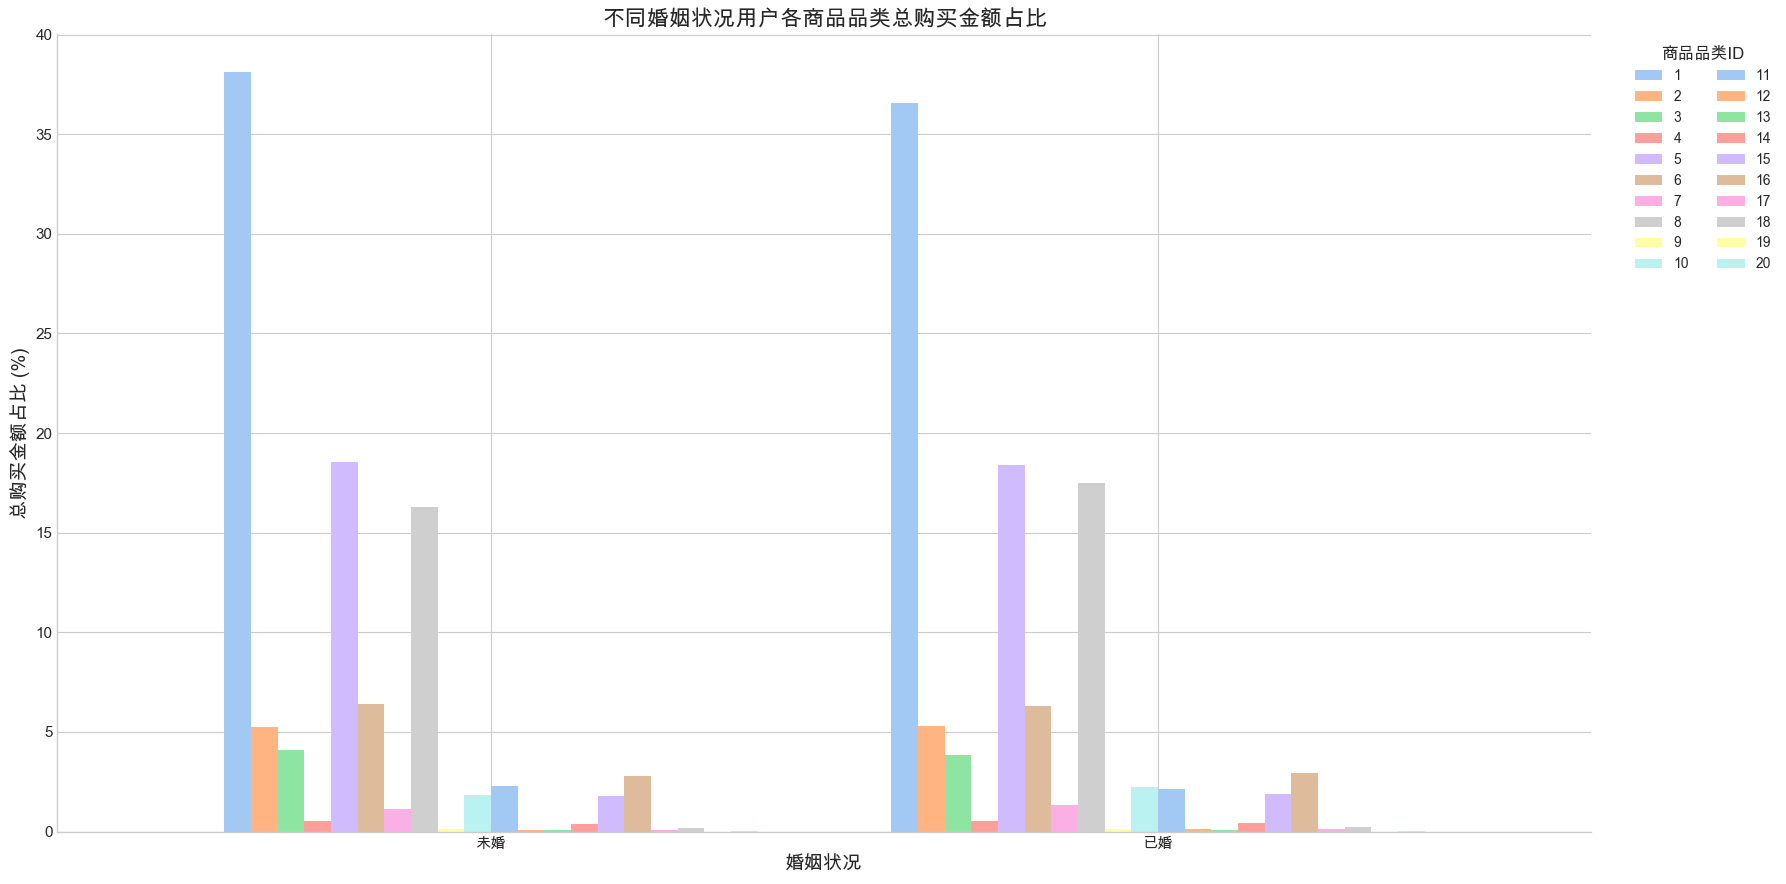

不同婚姻状况在各商品品类上的总购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status_Label,,,,,,,,,,,,,,,,,,,,
未婚,11465949.920,1580090.580,1239228.790,165646.690,5580055.740,1925816.560,334843.110,4895332.230,39225.920,546309.830,693088.360,27453.470,22925.410,110696.610,534982.690,842412.390,30194.600,49232.840,352.600,5436.130
已婚,7634187.620,1105071.280,801618.340,108158.190,3838296.550,1315686.460,274124.200,3647855.760,24477.320,462063.180,444822.790,25864.970,17160.600,89450.350,394707.730,608793.730,28592.390,43669.170,241.180,4011.140


In [9]:
if df is not None:
    df_marital_labeled = df.assign(Marital_Status_Label=df['Marital_Status'].map({0: '未婚', 1: '已婚'}))
    
    marital_category_purchase_sum = df_marital_labeled.groupby(['Marital_Status_Label', 'Product_Category'], observed=False)['Purchase'].sum().unstack(fill_value=0)
    marital_category_purchase_percentage = marital_category_purchase_sum.apply(lambda x: x / x.sum() * 100, axis=1)
    
    marital_category_purchase_percentage.plot(kind='bar', figsize=(18, 9), width=0.8)
    plt.title('不同婚姻状况用户各商品品类总购买金额占比')
    plt.xlabel('婚姻状况')
    plt.ylabel('总购买金额占比 (%)')
    plt.xticks(rotation=0)
    plt.legend(title='商品品类ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
    sns.despine()
    plt.tight_layout()
    plt.show()

    print("不同婚姻状况在各商品品类上的总购买金额:")
    display(marital_category_purchase_sum)

### 4. 用户群体 vs. 商品品类平均购买金额 (客单价分析)

分析不同用户群体在购买不同品类商品时的平均花费，即客单价。这有助于我们理解哪些品类对于特定用户群体来说是高价值购买。

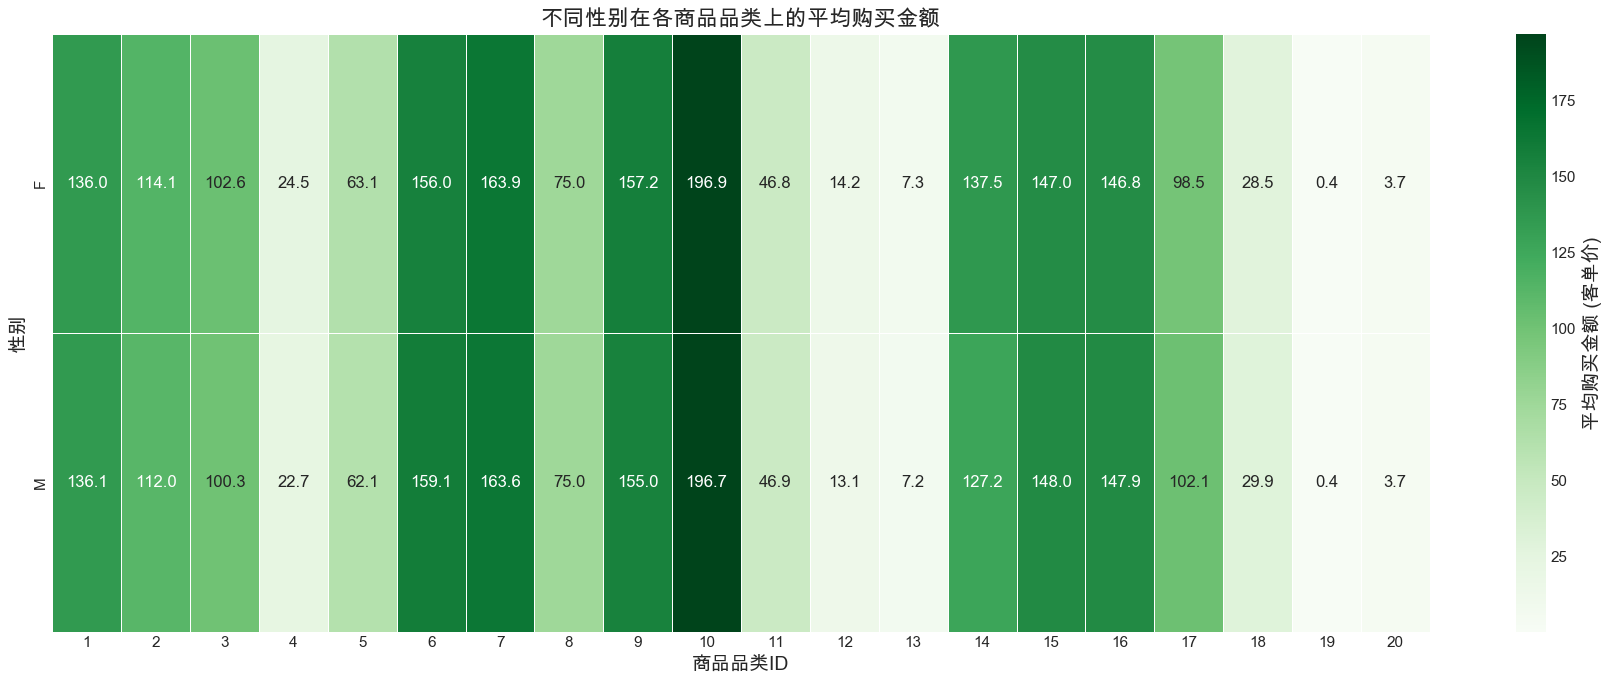

不同性别在各商品品类上的平均购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,135.972,114.075,102.627,24.549,63.072,155.964,163.949,74.999,157.243,196.921,46.764,14.229,7.338,137.474,146.953,146.815,98.464,28.486,0.377,3.716
M,136.082,112.036,100.266,22.735,62.142,159.079,163.558,74.986,154.989,196.707,46.874,13.052,7.183,127.223,147.974,147.934,102.097,29.902,0.368,3.701


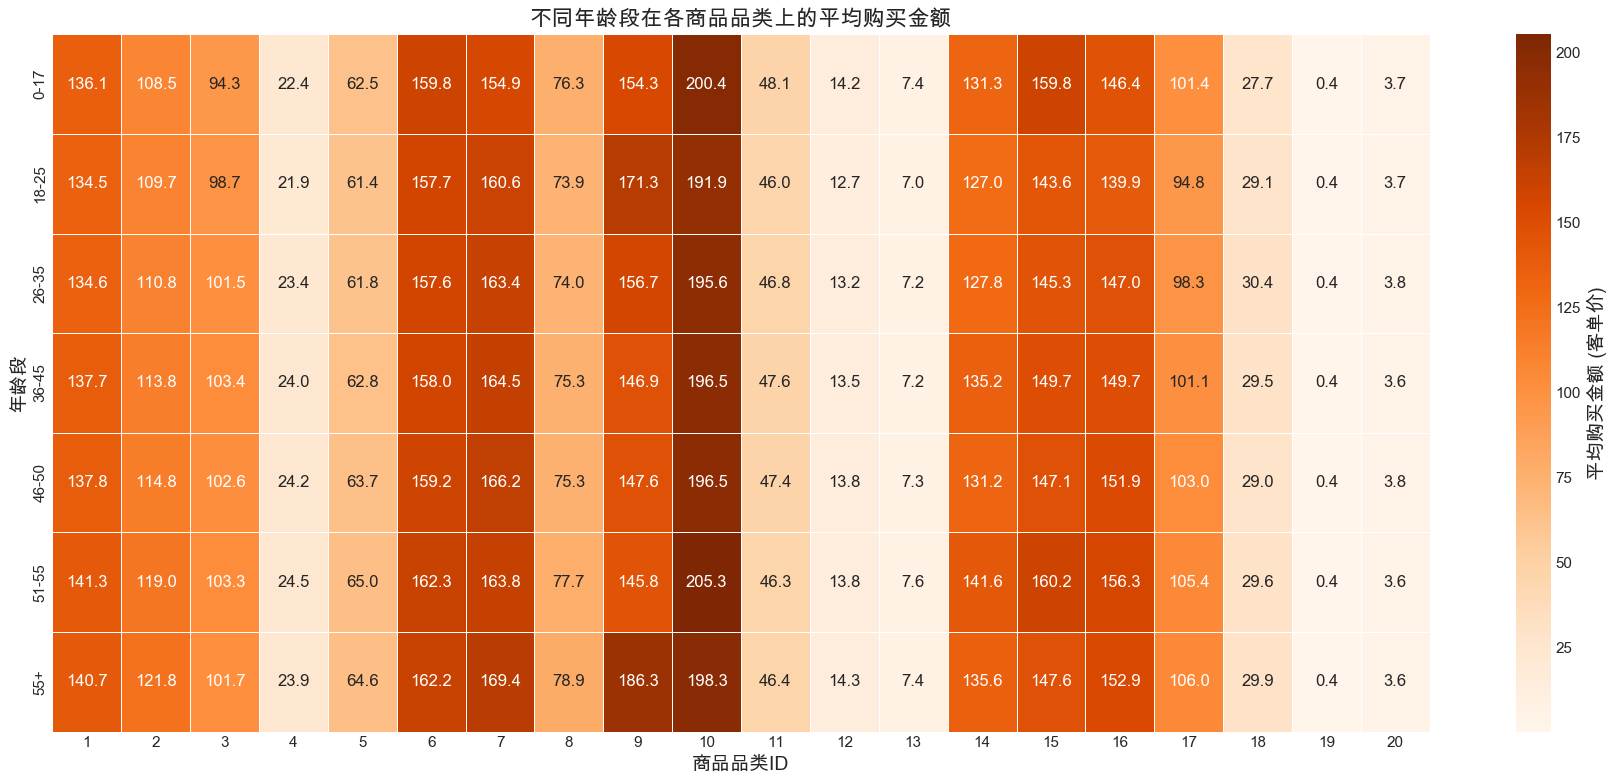


不同年龄段在各商品品类上的平均购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,136.076,108.520,94.315,22.447,62.494,159.828,154.908,76.328,154.349,200.385,48.082,14.237,7.373,131.340,159.846,146.360,101.438,27.668,0.385,3.680
18-25,134.489,109.667,98.717,21.944,61.426,157.686,160.629,73.876,171.277,191.922,45.971,12.730,7.019,127.045,143.582,139.934,94.765,29.098,0.360,3.673
26-35,134.563,110.839,101.548,23.402,61.767,157.587,163.412,74.007,156.738,195.602,46.771,13.222,7.167,127.811,145.259,146.983,98.290,30.392,0.368,3.765
36-45,137.671,113.759,103.403,24.005,62.831,158.034,164.510,75.286,146.894,196.520,47.627,13.503,7.198,135.235,149.669,149.687,101.112,29.488,0.370,3.641
46-50,137.781,114.791,102.617,24.200,63.720,159.167,166.200,75.326,147.594,196.547,47.423,13.834,7.307,131.171,147.099,151.862,102.966,28.962,0.371,3.842
51-55,141.258,119.016,103.274,24.460,65.022,162.271,163.769,77.721,145.767,205.307,46.283,13.804,7.628,141.612,160.216,156.299,105.380,29.647,0.379,3.618
55+,140.651,121.806,101.664,23.877,64.636,162.186,169.427,78.923,186.264,198.283,46.403,14.310,7.384,135.636,147.598,152.901,106.008,29.938,0.389,3.591


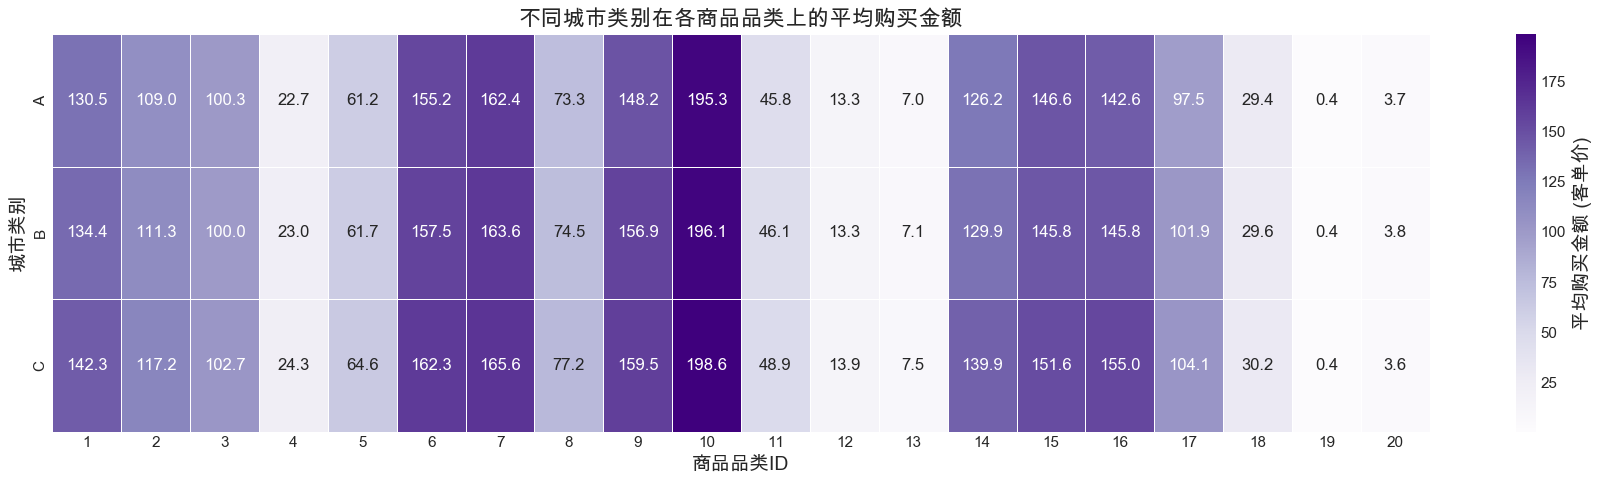


不同城市类别在各商品品类上的平均购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,130.472,109.036,100.324,22.697,61.178,155.198,162.392,73.281,148.211,195.305,45.779,13.347,7.040,126.169,146.551,142.617,97.477,29.395,0.369,3.743
B,134.359,111.339,99.981,23.001,61.686,157.510,163.551,74.548,156.905,196.125,46.123,13.295,7.138,129.927,145.846,145.844,101.913,29.592,0.380,3.804
C,142.340,117.152,102.710,24.267,64.587,162.272,165.577,77.212,159.511,198.627,48.899,13.946,7.520,139.867,151.587,155.035,104.114,30.178,0.366,3.635


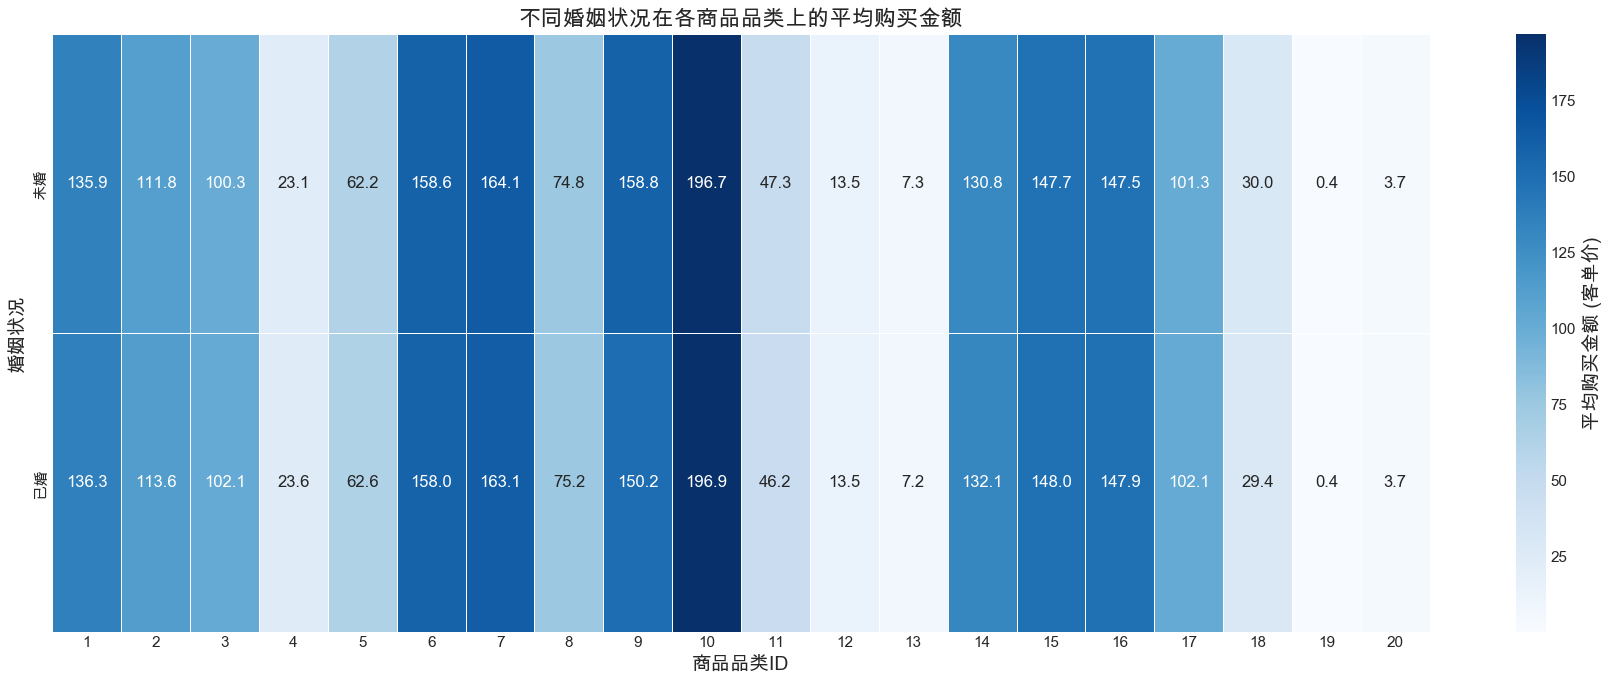


不同婚姻状况在各商品品类上的平均购买金额:


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status_Label,,,,,,,,,,,,,,,,,,,,
未婚,135.893,111.762,100.269,23.080,62.239,158.647,164.139,74.840,158.809,196.656,47.252,13.497,7.250,130.847,147.663,147.455,101.324,30.002,0.373,3.673
已婚,136.317,113.620,102.065,23.636,62.638,158.002,163.072,75.192,150.168,196.874,46.244,13.521,7.189,132.128,147.997,147.945,102.116,29.427,0.367,3.749


In [10]:
if df is not None:
    # 计算总购买金额 (我们已经有 gender_category_purchase_sum, age_category_purchase_sum 等)
    # 计算总购买次数 (我们已经有 gender_category_counts, age_category_counts 等)

    # --- 性别 vs. 品类客单价 ---
    gender_category_avg_purchase = gender_category_purchase_sum / gender_category_counts.replace(0, np.nan) # 避免除以0，用NaN代替
    plt.figure(figsize=(18, 7))
    sns.heatmap(gender_category_avg_purchase, annot=True, fmt=".1f", cmap="Greens", linewidths=.5, cbar_kws={'label': '平均购买金额 (客单价)'})
    plt.title('不同性别在各商品品类上的平均购买金额')
    plt.xlabel('商品品类ID')
    plt.ylabel('性别')
    plt.tight_layout()
    plt.show()
    print("不同性别在各商品品类上的平均购买金额:")
    display(gender_category_avg_purchase.fillna(0)) #用0填充NaN方便阅读

    # --- 年龄段 vs. 品类客单价 ---
    age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
    age_category_avg_purchase = age_category_purchase_sum.reindex(age_order) / age_category_counts.reindex(age_order).replace(0, np.nan)
    plt.figure(figsize=(18, 8))
    sns.heatmap(age_category_avg_purchase, annot=True, fmt=".1f", cmap="Oranges", linewidths=.5, cbar_kws={'label': '平均购买金额 (客单价)'})
    plt.title('不同年龄段在各商品品类上的平均购买金额')
    plt.xlabel('商品品类ID')
    plt.ylabel('年龄段')
    plt.tight_layout()
    plt.show()
    print("\n不同年龄段在各商品品类上的平均购买金额:")
    display(age_category_avg_purchase.fillna(0))

    # --- 城市类别 vs. 品类客单价 ---
    city_order = sorted(df['City_Category'].unique().astype(str))
    city_category_avg_purchase = city_category_purchase_sum.reindex(city_order) / city_category_counts.reindex(city_order).replace(0, np.nan)
    plt.figure(figsize=(18, 5))
    sns.heatmap(city_category_avg_purchase, annot=True, fmt=".1f", cmap="Purples", linewidths=.5, cbar_kws={'label': '平均购买金额 (客单价)'})
    plt.title('不同城市类别在各商品品类上的平均购买金额')
    plt.xlabel('商品品类ID')
    plt.ylabel('城市类别')
    plt.tight_layout()
    plt.show()
    print("\n不同城市类别在各商品品类上的平均购买金额:")
    display(city_category_avg_purchase.fillna(0))

    # --- 婚姻状况 vs. 品类客单价 ---
    df_marital_labeled = df.assign(Marital_Status_Label=df['Marital_Status'].map({0: '未婚', 1: '已婚'})) #确保此列存在
    marital_category_purchase_sum_local = df_marital_labeled.groupby(['Marital_Status_Label', 'Product_Category'], observed=False)['Purchase'].sum().unstack(fill_value=0)
    marital_category_counts_local = df_marital_labeled.groupby(['Marital_Status_Label', 'Product_Category'], observed=False).size().unstack(fill_value=0)
    
    marital_category_avg_purchase = marital_category_purchase_sum_local / marital_category_counts_local.replace(0, np.nan)
    plt.figure(figsize=(18, 7))
    # 使用已有的 marital_category_counts 和 marital_category_purchase_sum
    sns.heatmap(marital_category_avg_purchase, annot=True, fmt=".1f", cmap="Blues", linewidths=.5, cbar_kws={'label': '平均购买金额 (客单价)'})
    plt.title('不同婚姻状况在各商品品类上的平均购买金额')
    plt.xlabel('商品品类ID')
    plt.ylabel('婚姻状况')
    plt.tight_layout()
    plt.show()
    print("\n不同婚姻状况在各商品品类上的平均购买金额:")
    display(marital_category_avg_purchase.fillna(0))


### 5. 综合洞察与高价值用户-品类识别 (讨论与总结)

在分别对购买次数、购买总金额和平均客单价进行深入分析后，我们现在可以将这些信息综合起来，识别出对平台具有显著价值或潜力的用户-品类组合。

**关键考量维度回顾：**
*   **购买次数（用户偏好/粘性）**：反映了品类受用户欢迎的程度和用户对品类的基础需求。
*   **总购买金额（GMV贡献）**：直接体现了品类为平台带来的销售额。
*   **平均客单价（价值水平）**：反映了用户单次购买该品类商品的平均花费，是衡量品类价值水平的重要指标。

**综合分析与讨论：**

1.  **普适性的核心价值品类组合：**
    *   **品类1 (旗舰引擎型)**：
        *   **特点**：购买次数非常高（男女均为主力之一，男性尤其偏好），总购买金额贡献在所有用户群体中均名列前茅（男性用户GMV占比高达40.2%，女性28.5%），且客单价非常高（普遍在130-142范围）。
        *   **解读**：这是平台的绝对GMV支柱和高价值核心品类。它不仅吸引了大量购买，而且单次购买价值高。
    *   **品类5 (高频引流型)**：
        *   **特点**：购买次数在多数用户群体中排名第一或第二（女性最偏好，男性亦高），总购买金额贡献巨大。客单价中等（约61-65）。
        *   **解读**：典型的“流量型”和“用户粘性型”品类，用户基数大，购买频率高，是平台获取用户、维持活跃度的重要基石。
    *   **品类8 (广泛需求型)**：
        *   **特点**：购买次数排名非常靠前，总购买金额贡献也十分显著。客单价中等偏下（约73-79）。老年群体对其偏好度（次数和金额占比）尤其突出。
        *   **解读**：与品类5类似，是重要的流量和粘性来源，覆盖用户群体广泛，特别是满足了老年群体的核心需求。

2.  **高客单价潜力品类 (利润增长点)：**
    *   **品类10 (极致高客单价)**：客单价全场最高（约195-205），远超其他品类。但其购买次数和总金额贡献相对较低。
        *   **解读**：可能是特定奢侈品、专业设备或高价值服务。需要在不影响平台主流用户的前提下，精准定位其少数目标客户（如0-17岁尝鲜/礼物购买，51-55岁高消费力人群）。
    *   **品类6, 7, 9, 15, 16, 17 (高客单价群)**：这些品类的客单价普遍较高（大部分在100-160+）。它们的购买频次和总金额贡献不如核心品类1, 5, 8，但单次购买价值较高。
        *   **解读**：这些是提升平台整体利润率和客单价的潜力所在。例如品类6和7的客单价都非常可观。

3.  **特定用户群体的独特高价值品类组合：**
    *   **男性用户 + 品类1**：男性在品类1上的总消费金额、金额占比及客单价均表现突出。品类1是男性用户核心的高价值消费领域。
    *   **C类城市用户 + 品类1 (及其他高ASP品类)**：C类城市用户不仅在品类1上展现出最高的总消费金额占比 (40.2%) 和客单价 (142.3)，在品类2, 7, 8, 10, 11, 14, 15, 16, 17等多个高/中客单价品类上，其客单价也均为三类城市中最高。这印证了C类城市是高消费潜力市场。
    *   **55+岁用户 + 品类8 & 品类9**：品类8是55+用户购买次数和金额占比最高的品类，客单价也相对稳健。品类9在该年龄段的客单价 (186.3) 表现异常突出，远超其他年龄段。
    *   **女性用户 + 品类14**：虽然品类14整体购买量不大，但女性用户在该品类的客单价 (137.5) 显著高于男性 (127.2)，是针对女性的特定较高价值品类。
    *   **0-17岁用户 & 51-55岁用户 + 品类10**：这两个年龄段在客单价最高的品类10上，也分别展现了该品类在所有年龄段中的客单价峰值。这可能与特定时期的礼物购买、兴趣投入或家庭集中采购有关。

**初步结论性思考：**
*   平台的核心竞争力在于品类1, 5, 8的组合，它们分别扮演了价值标杆、流量引擎和广泛需求满足者的角色。
*   提升平台盈利能力的关键在于挖掘高客单价潜力品类，并将其精准匹配给合适的用户群体。
*   用户分群运营至关重要，不同性别、年龄、特别是不同城市级别的用户，其品类偏好和消费能力存在显著差异。

### 6. 阶段三总结与后续步骤 (项目结论)

在本阶段的深入分析中，我们结合用户的人口统计学特征，从购买次数偏好、总消费金额贡献以及平均客单价三个核心维度，系统地剖析了不同用户群体与各商品品类之间的复杂关系。这为我们理解用户行为、优化品类结构、制定精准营销策略奠定了坚实的数据基础。

**主要发现汇总：**

1.  **核心用户画像**：平台用户以男性（约75%）、26-35岁年龄段（约40%）为主，B类城市用户数量最多（42%）。然而，**C类城市用户展现出最强的整体消费能力和最高的品类客单价**。
2.  **品类结构与价值贡献**：
    *   **品类1**：是平台GMV的绝对核心引擎，贡献了最高的总销售额，且拥有非常高的客单价。它受到各群体的广泛购买，尤其受男性、年轻及中年群体、C类城市用户的重点消费。
    *   **品类5和品类8**：是平台最主要的高频购买品类，贡献了巨大的购买次数和可观的销售额，是获取用户、维持平台活跃度和用户粘性的基石。其客单价相对品类1较低。
    *   **高客单价潜力品类群 (如品类6, 7, 9, 10, 14, 15, 16, 17等)**：这些品类虽然整体购买频次和总金额不如前三者，但其平均客单价非常突出，是提升平台整体盈利能力和满足用户多样化高价值需求的关键。
3.  **关键用户群体-品类洞察**：
    *   **性别**：男性在品类1（高价值）上的消费意愿和能力远超女性；女性在品类14上展现出更高的客单价。
    *   **年龄**：品类1是各年龄段最主要的消费支出品类。品类8的消费重要性随年龄增长而提升，对55+群体尤其重要。品类9在55+群体中客单价极高。品类10在青少年和51-55岁群体中客单价表现突出。
    *   **城市类别**：C类城市用户在品类1及多数高客单价品类上均表现出最高的平均花费，是高价值用户的集中地。
    *   **婚姻状况**：对品类偏好、消费金额结构及客单价的影响均不显著。

**项目结论与商业建议：**

1.  **强化核心品类，优化结构与体验：**
    *   **品类1 (旗舰与利润核心)**：应作为战略核心品类进行深耕。保障其商品多样性、品质及供应链稳定性。针对男性（特别是年轻和中年主力）和C类城市用户进行重点营销，如“品质升级”、“新品首发”、“尊享体验”等主题。持续分析其高客单价构成，优化商品组合。
    *   **品类5 & 品类8 (流量与粘性基石)**：维持其价格竞争力、便捷性和商品丰富度。通过智能推荐、场景化搭配（如与品类1或其他高ASP品类组合）等方式提升其交叉销售和向上销售的贡献。加强用户复购激励，如会员权益、积分活动等。

2.  **挖掘高客单价潜力品类，提升平台价值：**
    *   **品类群 (6, 7, 9, 10, 14, 15, 16, 17等)**：系统性分析这些品类的具体商品构成和当前主要消费人群。针对不同品类特性，如品类10（最高ASP）可尝试面向特定高净值人群或特殊需求场景（如礼物季的青少年）进行精准推广。品类6、7（假设为服饰、个护）等可结合潮流趋势和用户画像进行细分运营。

3.  **实施精细化用户分群运营策略：**
    *   **针对C类城市高潜力市场**：将其作为新品类、高价值商品的优先推广区域，并提供更优质的物流和客户服务，进一步提升其用户价值。
    *   **针对男性用户**：强化品类1的营销，并根据其年龄和职业特征，推荐相关的科技、运动、专业工具等高ASP或高相关性品类。
    *   **针对55+老年用户**：重点满足其在品类8上的需求，并可尝试推广品类9（高ASP）中适合老年人的商品。
    *   **针对女性用户**：在巩固其对品类5、8的消费基础上，通过个性化推荐和内容营销，引导其关注和消费品类1、6、7、10、14等能提升生活品质和满足个性化需求的高价值品类。

4.  **数据驱动的持续优化：**
    *   建立用户标签体系，对用户进行更细致的画像和分层。
    *   监控各品类及用户群体的动态变化，定期调整品类策略和营销方案。
    *   尝试A/B测试不同的推荐算法和促销机制，以提升转化率和客单价。

**项目局限性与未来展望：**

*   **数据局限**：本分析基于的`walmart.csv`是公开数据集，且部分字段（如职业、具体商品品类名称）被“遮盖”，分析结论的业务针对性受到一定限制。实际应用中需结合企业真实的、更细致的数据（如商品详细信息、用户完整行为路径等）。
*   **分析维度**：本次分析未包含时间序列维度，无法捕捉季节性、促销活动、用户生命周期阶段等因素对购买行为的影响。
*   **可拓展分析**：未来可进一步引入RFM模型进行用户价值分层，进行购物篮分析以发现品类间的关联规则，构建用户流失预警模型，以及更复杂的机器学习预测模型等，从而为业务提供更深层次、更动态的洞察。

**本项目通过对现有数据的系统性整理、多维度探索和深入分析，从用户画像、品类结构、消费行为等多个角度提炼了关键洞察，并据此形成了具有实际操作意义的商业建议。这充分展示了运用数据分析解决商业问题的能力，可作为一份体现个人综合分析能力的作品集。**